In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [2]:
# 한 이미지의 특징들을 다른 이미지들과 비교하는 방법

# 브루트 포스 방식: cv.BFMatcher
# 두 이미지에서 뽑은 특징 디스크립터를 비교해 거리 계산
#  - normType 
#    = 기본 cv.NORM_L2 (SIFT,SUFT에 좋음)
#    = cv.NORM_HAMMING2(ORB)           
# - crosscheck ( true면 매치되는 값만 반환 )

# BFMatcher.match() - 가장 잘 맞는 결과만 반환
# BFMatcher.knnMatch() - 최적의 K개 결과 반환


In [10]:

img1 = cv.imread('../samples/box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('../samples/box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# matches = DMatch 객체 리스트!
#DMatch.distance - 디스크립터 사이의 거리(낮을수록 좋음)
#DMatch.trainIdx - 학습 데이터의 디스크립터 인덱스
#DMatch.queryIdx - 테스트 데이터의 디스크립터 인덱스
#DMatch.imgIdx - 학습 이미지 인덱스

len(matches), matches[0].distance

(149, 80.0)

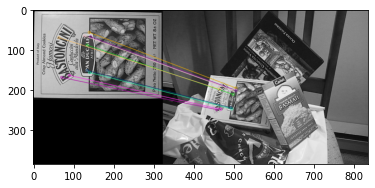

(<matplotlib.image.AxesImage at 0x1f7b11646a0>, None)

In [11]:

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [13]:
# FLANN 기반 Matcher
# for SIFT, SURF
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [12]:
# for ORB
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

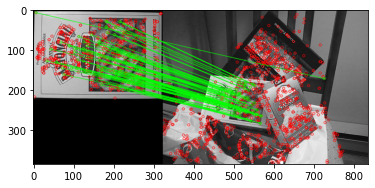

(<matplotlib.image.AxesImage at 0x1f7b1145b50>, None)

In [14]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()